In [1]:
import statsmodels.iolib.summary2

SAMPLE_LENGTH = 12
PREDICT_LENGTH = 6

https://blog.csdn.net/weixin_39653948/article/details/105385622

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Flatten, Bidirectional, GRU
from tensorflow.keras.layers import TimeDistributed, RepeatVector
import pandas as pd
import time
import pickle
from datetime import datetime

### 數據處理
* 切割出 train_seq 與對應之 train_seq_label_seq，以及 test_seq

### 測試數據一

In [3]:
# import pandas as pd
# df = pd.read_csv('data/event/Siou_Luan/秀巒_event2_201009.csv')
# df['Time'] = pd.to_datetime(df['Time'])

In [4]:
# start, end = 0, 50
# Y = df[['rain_白石']][start:end]
# X = df[['Time']][start:end]
# plt.plot(X, Y)
# plt.show()

In [5]:
# test_seq = np.array(df[['rain_白石']][26-sample_length:26])
# test_seq

#### 測試數據二

In [6]:
pop_index = 7

import os
target_folder_path = 'data/event/Siou_Luan'
list_of_all_file = os.listdir(target_folder_path)

print(list_of_all_file)
test_seq_path = list_of_all_file.pop(pop_index)
print(list_of_all_file)

['秀巒_event10_201005.csv', '秀巒_event1_201002_多峰.csv', '秀巒_event2_201009.csv', '秀巒_event3_200809.csv', '秀巒_event4_200910.csv', '秀巒_event5_201206.csv', '秀巒_event6_201308.csv', '秀巒_event7_201407.csv', '秀巒_event8_201507.csv', '秀巒_event9_200803.csv']
['秀巒_event10_201005.csv', '秀巒_event1_201002_多峰.csv', '秀巒_event2_201009.csv', '秀巒_event3_200809.csv', '秀巒_event4_200910.csv', '秀巒_event5_201206.csv', '秀巒_event6_201308.csv', '秀巒_event8_201507.csv', '秀巒_event9_200803.csv']


In [7]:
print(len(list_of_all_file))


9


### 將 train_data 切成 train_seq 與對應 label

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
# sample_length = SAMPLE_LENGTH
# predict_length = PREDICT_LENGTH
#
# train_seq = []
# train_seq_label_seq = []
#
# target_df = pd.read_csv('data/雨量/白石01_19.csv', index_col=0)
# target_df['Time'] = pd.to_datetime(target_df['Time'])
#
# '''將降雨量/流量 標準化'''
# df_dimension = int(target_df.shape[0])
# Y = target_df[['Rainfall_y']]
# # scaler = MinMaxScaler(feature_range=(0, 1)).fit(Y)
# # Y = scaler.transform(Y)
#
# # Z = target_df[['Flow']]
# # # scaler = MinMaxScaler(feature_range=(0, 1)).fit(Z)
# # # Z = scaler.transform(Z)
#
# X = target_df[['Time']]
# plt.plot(X, Y)
# # plt.plot(X, Z)
# plt.show()
#
# for i in range(len(Y)):
#     if i+sample_length+predict_length < len(Y)+1:
#         train_seq.append(Y[i:i+sample_length])
#         train_seq_label_seq.append(Y[i+sample_length:i+sample_length+predict_length])

秀巒_event10_201005.csv


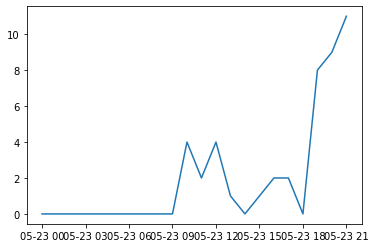

秀巒_event1_201002_多峰.csv


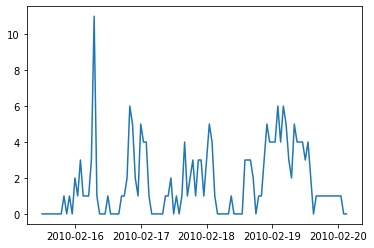

秀巒_event2_201009.csv


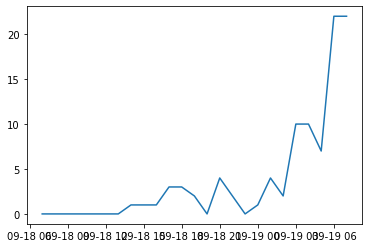

秀巒_event3_200809.csv


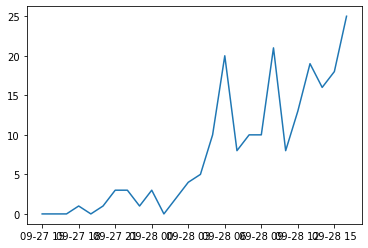

秀巒_event4_200910.csv


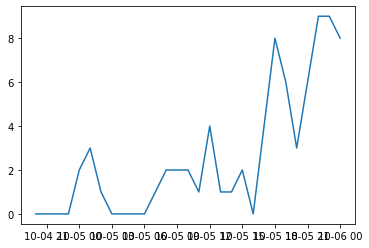

秀巒_event5_201206.csv


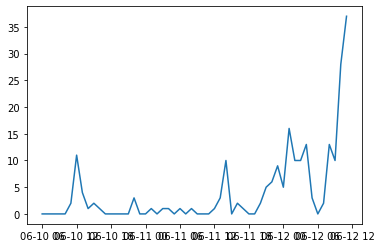

秀巒_event6_201308.csv


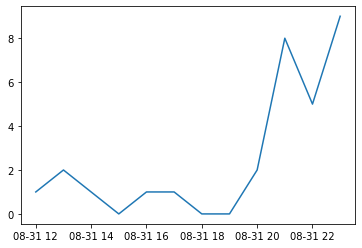

秀巒_event8_201507.csv


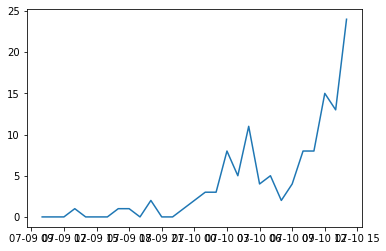

秀巒_event9_200803.csv


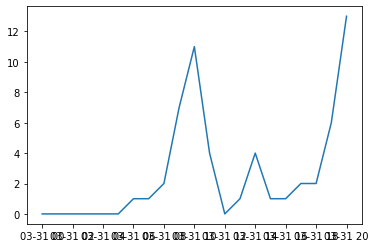

In [10]:
sample_length = SAMPLE_LENGTH
predict_length = PREDICT_LENGTH

train_seq = []
train_seq_label_seq = []

for file_index in range(len(list_of_all_file)):
    print(list_of_all_file[file_index])
    target_df = pd.read_csv('data/event/Siou_Luan_Ver2/'+str(list_of_all_file[file_index]))
    target_df['Time'] = pd.to_datetime(target_df['Time'])

    '''將降雨量/流量 標準化'''
    df_dimension = int(target_df.shape[0])
    Y = target_df[['rain_白石']]
    # scaler = MinMaxScaler(feature_range=(0, 1)).fit(Y)
    # Y = scaler.transform(Y)

    Z = target_df[['Flow']]
    # scaler = MinMaxScaler(feature_range=(0, 1)).fit(Z)
    # Z = scaler.transform(Z)

    X = target_df[['Time']]
    plt.plot(X, Y)
    # plt.plot(X, Z)
    plt.show()

    for i in range(len(Y)):
        if i+sample_length+predict_length < len(Y)+1:
            train_seq.append(Y[i:i+sample_length])
            train_seq_label_seq.append(Z[i+sample_length:i+sample_length+predict_length])

In [11]:
# target_folder_path = 'data/event/Siou_Luan'
# list_of_all_file = os.listdir(target_folder_path)
# list_of_all_file.pop(pop_index)
# for file_index in range(len(list_of_all_file)):
#     print(list_of_all_file[file_index])
#     target_df = pd.read_csv('data/event/Siou_Luan/'+str(list_of_all_file[file_index]))
#     target_df['Time'] = pd.to_datetime(target_df['Time'])
#
#     '''將降雨量/流量 標準化'''
#     df_dimension = int(target_df.shape[0])
#     Y = target_df[['rain_白石']]
#     # scaler = MinMaxScaler(feature_range=(0, 1)).fit(Y)
#     # Y = scaler.transform(Y)
#
#     Z = target_df[['Flow']]
#     # scaler = MinMaxScaler(feature_range=(0, 1)).fit(Z)
#     # Z = scaler.transform(Z)
#
#     X = target_df[['Time']]
#     plt.plot(X, Y)
#     # plt.plot(X, Z)
#     plt.show()
#
#     for i in range(len(Y)):
#         if i+sample_length+predict_length < len(Y)+1:
#             train_seq.append(Y[i:i+sample_length])
#             train_seq_label_seq.append(Y[i+sample_length:i+sample_length+predict_length])

In [12]:
# target_folder_path = 'data/event/Leng_Jiao'
# list_of_all_file = os.listdir(target_folder_path)
# for file_index in range(len(list_of_all_file)):
#     print(list_of_all_file[file_index])
#     target_df = pd.read_csv('data/event/Leng_Jiao/'+str(list_of_all_file[file_index]))
#     target_df['Time'] = pd.to_datetime(target_df['Time'])
#
#     '''將降雨量/流量 標準化'''
#     df_dimension = int(target_df.shape[0])
#     Y = target_df[['rain_嘎拉賀']]
#     scaler = MinMaxScaler(feature_range=(0, 1)).fit(Y)
#     Y = scaler.transform(Y)
#
#     Z = target_df[['Flow']]
#     scaler = MinMaxScaler(feature_range=(0, 1)).fit(Z)
#     Z = scaler.transform(Z)
#
#     X = target_df[['Time']]
#     plt.plot(X, Y)
#     # plt.plot(X, Z)
#     plt.show()
#
#     for i in range(len(Y)):
#         if i+sample_length+predict_length < len(Y)+1:
#             train_seq.append(Y[i:i+sample_length])
#             train_seq_label_seq.append(Y[i+sample_length:i+sample_length+predict_length])

#### 決定 test sequence

秀巒_event7_201407.csv


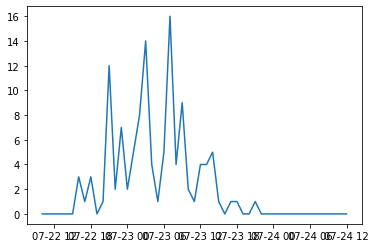

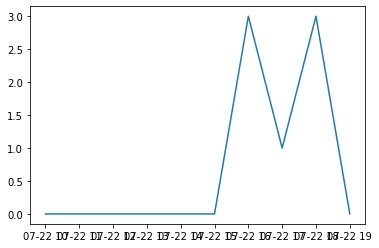

test sequence: 
   rain_白石
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      3.0
7      1.0
8      3.0
9      0.0
absolute rainfall: 
    rain_白石
10      1.0
11     12.0
12      2.0
13      7.0
14      2.0
15      5.0
absolute flow: 
     Flow
10   5.07
11   5.55
12   6.30
13   9.47
14  12.90
15  16.84
test sequence: 
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    3.0
7    1.0
8    3.0
9    0.0
Name: rain_白石, dtype: float64
absolute rainfall: 
[ 1. 12.  2.  7.  2.  5.]
absolute flow: 
[ 5.07  5.55  6.3   9.47 12.9  16.84]


In [13]:
test_seq_start_index = 10 #7
print(test_seq_path)
test_data_df = pd.read_csv('data/event/Siou_Luan/'+str(test_seq_path))
test_data_df['Time'] = pd.to_datetime(test_data_df['Time'])

Z = test_data_df[['Flow']]
Y = test_data_df[['rain_白石']]
X = test_data_df[['Time']]

'''標準化'''
# scaler = MinMaxScaler(feature_range=(0, 1)).fit(Y)
# Y = scaler.transform(Y)
#
# scaler = MinMaxScaler(feature_range=(0, 1)).fit(Z)
# Z = scaler.transform(Z)

plt.plot(X, Y)
plt.show()

Z_plot = Z[:test_seq_start_index]
Y_plot = Y[:test_seq_start_index]
X_plot = X[:test_seq_start_index]
plt.plot(X_plot, Y_plot)
plt.show()

test_seq = Y_plot[-sample_length:]

print(f'test sequence: \n{test_seq}')
print(f'absolute rainfall: \n{Y[test_seq_start_index:test_seq_start_index+predict_length]}')
print(f'absolute flow: \n{Z[test_seq_start_index:test_seq_start_index+predict_length]}')
print(f'test sequence: \n{np.squeeze(test_seq)}')
absolute_rainfall = np.squeeze(np.array(Y[test_seq_start_index:test_seq_start_index+predict_length]))
absolute_flow = np.squeeze(np.array(Z[test_seq_start_index:test_seq_start_index+predict_length]))
print(f'absolute rainfall: \n{np.squeeze(np.array(Y[test_seq_start_index:test_seq_start_index+predict_length]))}')
print(f'absolute flow: \n{np.squeeze(np.array(Z[test_seq_start_index:test_seq_start_index+predict_length]))}')


In [14]:
sliding_window_width = len(train_seq[0])
n_features = 1

train_seq = np.array(train_seq)
train_seq_label_seq = np.array(train_seq_label_seq)
test_seq = np.squeeze(np.array(test_seq))

'''補足test_seq維度'''
if len(test_seq) < sample_length:
    test_seq = np.pad(test_seq,(sample_length-len(test_seq),0),'constant',constant_values=0)

train_seq = train_seq.reshape((train_seq.shape[0], train_seq.shape[1], n_features))
train_seq_label_seq = train_seq_label_seq.reshape((train_seq_label_seq.shape[0], train_seq_label_seq.shape[1]))
test_seq = test_seq.reshape((1, test_seq.shape[0], n_features))

In [15]:
print(f'shape of train sequence :{train_seq.shape}')
print(f'shape of train sequence label:{train_seq_label_seq.shape}')
print(f'shape of test sequence:{test_seq.shape}')

shape of train sequence :(182, 12, 1)
shape of train sequence label:(182, 6)
shape of test sequence:(1, 12, 1)


In [16]:
def timer(start,end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    time_spent = "{:0>2}h:{:0>2}m:{:05.2f}s".format(int(hours),int(minutes),seconds)
    print(time_spent)
    return time_spent

True, 該目錄已存在
-------以下為【編碼器-解碼器 GRU 模型 】相關訊息-------
train_seq.shape: (182, 12, 1)
train_seq_label_seq.shape: (182, 6)
test_seq.shape: (1, 12, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 repeat_vector (RepeatVector  (None, 6, 128)           0         
 )                                                               
                                                                 
 gru_1 (GRU)                 (None, 6, 128)            99072     
                                                                 
 time_distributed (TimeDistr  (None, 6, 1)             129       
 ibuted)                                                         
                                                                 
Total params: 149,505
Trainable params: 149

No handles with labels found to put in legend.


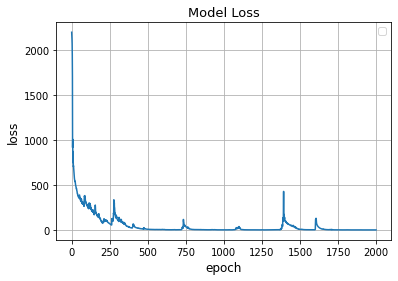

No handles with labels found to put in legend.


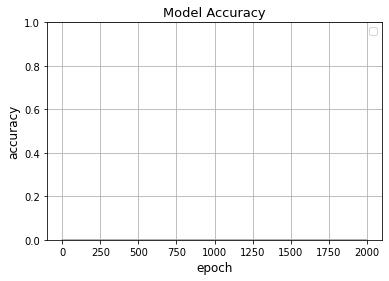

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 31168 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24018 missing from current font.
  font.set_text(s, 0.0, flags=flags)


prediction of encoder-decoder GRU: [2.3270528 1.717384  1.8508278 2.0716033 2.1238952 2.2865136]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 31168 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 24018 missing from current font.
  font.set_text(s, 0, flags=flags)


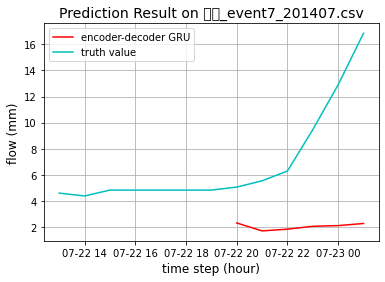

True, 該目錄已存在
-------以下為【編碼器-解碼器 GRU 模型 】相關訊息-------
train_seq.shape: (182, 12, 1)
train_seq_label_seq.shape: (182, 6)
test_seq.shape: (1, 12, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 256)               198912    
                                                                 
 repeat_vector_1 (RepeatVect  (None, 6, 256)           0         
 or)                                                             
                                                                 
 gru_3 (GRU)                 (None, 6, 256)            394752    
                                                                 
 time_distributed_1 (TimeDis  (None, 6, 1)             257       
 tributed)                                                       
                                                                 
Total params: 593,921
Trainable params: 5

No handles with labels found to put in legend.


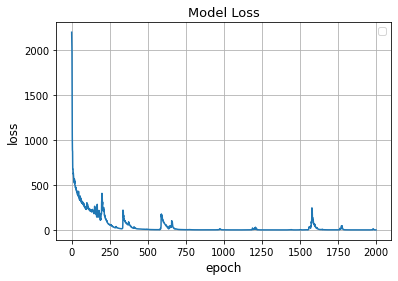

No handles with labels found to put in legend.


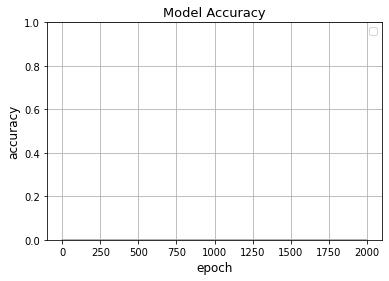

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 31168 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24018 missing from current font.
  font.set_text(s, 0.0, flags=flags)


prediction of encoder-decoder GRU: [2.73393   3.193842  3.561911  3.7638817 3.9297934 4.109023 ]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 31168 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 24018 missing from current font.
  font.set_text(s, 0, flags=flags)


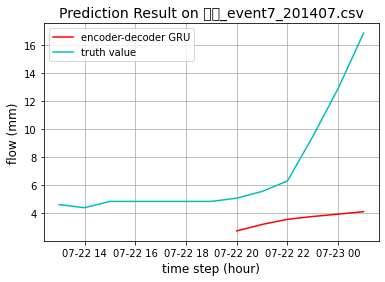

In [17]:
ACTIVATION_LIST = ['relu']
# LSTM_LAYER_INPUT_SIZE = 100
LSTM_LAYER_INPUT_SIZE_LIST = [128, 256]
# EPOCH_LIST = [800]
EPOCH_LIST = [2000]
BATCH_SIZE_LIST = [64]
verbose_set = 2

for ACTIVATION in ACTIVATION_LIST:
    for LSTM_LAYER_INPUT_SIZE in LSTM_LAYER_INPUT_SIZE_LIST:
        for BATCH_SIZE in BATCH_SIZE_LIST:
            for EPOCH in EPOCH_LIST:
                class MultiStepModels:
                    '''
                    多時間步 預測 時間序列 GRU 模型
                    '''

                    def __init__(self, train_seq, train_seq_label_seq, test_seq,
                                 sw_width, pred_length,
                                 features, epochs_num, verbose_set,
                                 training_log_folder_path,
                                 list_of_all_file,
                                 test_seq_start_index,
                                 test_seq_path,
                                 absolute_rainfall,
                                 absolute_flow,
                                 flag = 0):
                        self.train_seq = train_seq
                        self.train_seq_label_seq = train_seq_label_seq
                        self.test_seq = test_seq
                        self.sw_width = sw_width
                        self.pred_length = pred_length

                        self.features = features
                        self.epochs_num = epochs_num

                        # verbose = 0 为不在标准输出流输出日志信息
                        # verbose = 1 为输出进度条记录
                        # verbose = 2 为每个epoch输出一行记录
                        self.verbose_set = verbose_set

                        self.flag = flag
                        self.training_log_folder_path = training_log_folder_path
                        self.list_of_all_file = list_of_all_file
                        self.test_seq_path = test_seq_path
                        self.test_seq_start_index = test_seq_start_index
                        self.absolute_rainfall = absolute_rainfall
                        self.absolute_flow = absolute_flow


                    def stacked_GRU(self):
                        start_time = time.time()
                        print(f'train_seq.shape: {self.train_seq.shape}')
                        print(f'train_seq_label_seq.shape: {self.train_seq_label_seq.shape}')
                        print(f'test_seq.shape: {self.test_seq.shape}')
                        model = Sequential()
                        model.add(GRU(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION, return_sequences=True,
                                       input_shape = (self.sw_width, self.features)))
                        model.add(GRU(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION))
                        model.add(Dense(units=self.pred_length))
                        model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
                        print(model.summary())

                        stacked_GRU_history = model.fit(self.train_seq,
                                                         self.train_seq_label_seq,
                                                         epochs=self.epochs_num,
                                                         verbose=self.verbose_set,
                                                         batch_size=BATCH_SIZE,
                                                         workers=16,
                                                         use_multiprocessing=True)
                        model.save(os.path.join(training_log_folder_path,'stacked_GRU_model.h5'))
                        end_time = time.time()
                        time_spent = timer(start_time, end_time)
                        print(f'訓練費時：'+time_spent)
                        print('\ntrain_acc:%s'%np.mean(stacked_GRU_history.history['accuracy']),
                              '\ntrain_loss:%s'%np.mean(stacked_GRU_history.history['loss']))
                        # print('y^hat:%s'%(model.predict(self.test_seq)),'\n-----------------------------')

                        '''保存訓練結果'''
                        hist_df = pd.DataFrame(stacked_GRU_history.history)
                        with open(os.path.join(training_log_folder_path,'stacked_GRU.txt'),'a',encoding='utf-8') as file:
                            file.write(f'訓練時間：'+time_spent+'\n')
                            file.write(f'訓練資料集：\n{list_of_all_file}\n')
                            file.write(f'測試資料路徑：{test_seq_path}\n')
                            file.write(f'測試資料開始預測位置：{test_seq_start_index}\n')
                            file.write(f'降雨量預測結果：{np.squeeze(model.predict(self.test_seq))}\n')
                            file.write(f'真實降雨量：{absolute_rainfall}\n')
                            file.write(f'真實流量：{absolute_flow}\n')
                            file.write(f"\n下為模型資訊：\n")
                            file.write(f'epoch數目：{epoch_num}\n')
                            file.write(f'GRU input size：{LSTM_LAYER_INPUT_SIZE}\n')
                            file.write(f'Activation function: '+ACTIVATION+'\n')
                            file.write(f'Batch size: {BATCH_SIZE}\n')
                            model.summary(print_fn=lambda  x: file.write(x + '\n'))
                            file.write("\n下為 loss 與 accuracy\n")
                            hist_df.to_string(file)
                        '''保存訓練結果'''

                        '''二進制的保存方法'''
                        # with open('training_log.txt','wb') as file:
                        #     pickle.dump(stacked_GRU_history.history, file)
                        '''二進制的保存方法'''

                        '''繪製 loss 隨 epoch 增加之表現'''
                        fig = plt.figure()
                        plt.plot(stacked_GRU_history.history['loss'])
                        plt.title('Model Loss', fontsize=13)
                        plt.ylabel('loss', fontsize=12)
                        plt.xlabel('epoch', fontsize=12)
                        plt.grid(True)
                        plt.legend()
                        plt.show()
                        fig.savefig(os.path.join(training_log_folder_path, 'stacked_GRU_model_loss.png'))
                        '''繪製 loss 隨 epoch 增加之表現'''

                        '''繪製 accuracy 隨 epoch 增加之表現'''
                        fig = plt.figure()
                        plt.plot(stacked_GRU_history.history['accuracy'], 'orange')
                        plt.title('Model Accuracy', fontsize=13)
                        plt.ylabel('accuracy', fontsize=12)
                        plt.xlabel('epoch', fontsize=12)
                        plt.ylim((0,1))
                        plt.grid(True)
                        plt.legend()
                        plt.show()
                        fig.savefig(os.path.join(training_log_folder_path, 'stacked_GRU_model_accuracy.png'))
                        '''繪製 accuracy 隨 epoch 增加之表現'''

                        return np.squeeze(model.predict(self.test_seq))

                    def encoder_decoder_GRU(self):
                        start_time = time.time()
                        print(f'train_seq.shape: {self.train_seq.shape}')
                        print(f'train_seq_label_seq.shape: {self.train_seq_label_seq.shape}')
                        print(f'test_seq.shape: {self.test_seq.shape}')
                        model = Sequential()
                        model.add(GRU(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION,
                                       input_shape = (self.sw_width, self.features)))
                        model.add(RepeatVector(self.pred_length))

                        model.add(GRU(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION, return_sequences=True))
                        model.add(TimeDistributed(Dense(1)))

                        '''版本二
                        model = Sequential()
                        model.add(GRU(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION,
                                       input_shape = (self.sw_width, self.features)))
                        model.add(RepeatVector(self.pred_length))

                        model.add(GRU(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION, return_sequences=True))

                        model.add(GRU(LSTM_LAYER_INPUT_SIZE, activation=ACTIVATION))
                        model.add(Dense(units=self.pred_length))
                        '''

                        model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
                        print(model.summary())

                        ed_GRU_history = model.fit(self.train_seq,
                                                    self.train_seq_label_seq,
                                                    epochs=self.epochs_num,
                                                    verbose=self.verbose_set,
                                                    batch_size=BATCH_SIZE,
                                                    workers=16,
                                                    use_multiprocessing=True)
                        model.save(os.path.join(training_log_folder_path,'encoder_decoder_GRU_model.h5'))

                        end_time = time.time()
                        time_spent = timer(start_time, end_time)
                        print(f'訓練費時：'+time_spent)
                        print('\ntrain_acc:%s'%np.mean(ed_GRU_history.history['accuracy']),
                              '\ntrain_loss:%s'%np.mean(ed_GRU_history.history['loss']))
                        # print('y^hat:%s'%(model.predict(self.test_seq)),'\n-----------------------------')

                        '''保存訓練結果'''
                        hist_df = pd.DataFrame(ed_GRU_history.history)
                        with open(os.path.join(training_log_folder_path,'encoder_decoder_GRU.txt'),'a',encoding='utf-8') as file:
                            file.write(f'訓練時間：'+time_spent+'\n')
                            file.write(f'訓練資料集：\n{list_of_all_file}\n')
                            file.write(f'測試資料路徑：{test_seq_path}\n')
                            file.write(f'測試資料開始預測位置：{test_seq_start_index}\n')
                            file.write(f'降雨量預測結果：{np.squeeze(model.predict(self.test_seq))}\n')
                            file.write(f'真實降雨量：{absolute_rainfall}\n')
                            file.write(f'真實流量：{absolute_flow}\n')
                            file.write(f"\n下為模型資訊：\n")
                            file.write(f'epoch數目：{epoch_num}\n')
                            file.write(f'LSTM input size：{LSTM_LAYER_INPUT_SIZE}\n')
                            file.write(f'Activation function: '+ACTIVATION+'\n')
                            file.write(f'Batch size: {BATCH_SIZE}\n')
                            model.summary(print_fn=lambda  x: file.write(x + '\n'))
                            file.write("\n下為 loss 與 accuracy\n")
                            hist_df.to_string(file)
                        '''保存訓練結果'''

                        '''繪製 loss 隨 epoch 增加之表現'''
                        fig = plt.figure()
                        plt.plot(ed_GRU_history.history['loss'])
                        plt.title('Model Loss', fontsize=13)
                        plt.ylabel('loss', fontsize=12)
                        plt.xlabel('epoch', fontsize=12)
                        plt.grid(True)
                        plt.legend()
                        plt.show()
                        fig.savefig(os.path.join(training_log_folder_path, 'encoder_decoder_GRU_model_loss.png'))
                        '''繪製 loss 隨 epoch 增加之表現'''

                        '''繪製 accuracy 隨 epoch 增加之表現'''
                        fig = plt.figure()
                        plt.plot(ed_GRU_history.history['accuracy'], 'orange')
                        plt.title('Model Accuracy', fontsize=13)
                        plt.ylabel('accuracy', fontsize=12)
                        plt.xlabel('epoch', fontsize=12)
                        plt.ylim((0,1))
                        plt.grid(True)
                        plt.legend()
                        plt.show()
                        fig.savefig(os.path.join(training_log_folder_path, 'encoder_decoder_GRU_model_accuracy.png'))

                        return np.squeeze(model.predict(self.test_seq))

                '''#%%'''
                stacked_GRU_prediction = np.array([])
                ed_GRU_prediction = np.array([])
                if __name__ == '__main__':

                    epoch_num = EPOCH

                    training_date_time = datetime.now().strftime('%Y-%m-%d'+'_'+'%H'+'h'+'-%M'+'m'+'-%S'+'s')
                    training_log_folder_path = 'model_training_log\\'+training_date_time
                    folder_path = os.path.exists('model_training_log')
                    if not folder_path:
                        os.makedirs('model_training_log')
                    else:
                        print(f'{folder_path}, 該目錄已存在')
                    os.mkdir(training_log_folder_path)
                    # print('-------以下為【Stacked GRU 模型 】相關訊息-------')
                    # MultiStepLSTM = MultiStepModels(train_seq, train_seq_label_seq, test_seq,
                    #                                 sliding_window_width, predict_length,
                    #                                 n_features, epoch_num, verbose_set,
                    #                                 training_log_folder_path=training_log_folder_path,
                    #                                 list_of_all_file=list_of_all_file,
                    #                                 test_seq_path=test_seq_path,
                    #                                 test_seq_start_index=test_seq_start_index,
                    #                                 absolute_rainfall=absolute_rainfall,
                    #                                 absolute_flow=absolute_flow)
                    # stacked_GRU_prediction = MultiStepLSTM.stacked_GRU()
                    # print(f'prediction of stacked GRU: {stacked_GRU_prediction}')

                    print('-------以下為【編碼器-解碼器 GRU 模型 】相關訊息-------')
                    MultiStepLSTM = MultiStepModels(train_seq, train_seq_label_seq, test_seq,
                                                    sliding_window_width, predict_length,
                                                    n_features, epoch_num, verbose_set,
                                                    training_log_folder_path=training_log_folder_path,
                                                    list_of_all_file=list_of_all_file,
                                                    test_seq_path=test_seq_path,
                                                    test_seq_start_index=test_seq_start_index,
                                                    absolute_rainfall=absolute_rainfall,
                                                    absolute_flow=absolute_flow,
                                                    flag=1)
                    ed_GRU_prediction = MultiStepLSTM.encoder_decoder_GRU()
                    print(f'prediction of encoder-decoder GRU: {ed_GRU_prediction}')



                '''#%%'''

                start_index, end_index = 3, 16
                X_summary = X[start_index:end_index]
                Y_summary = Y[start_index:end_index]
                Z_summary = Z[start_index:end_index]
                prediction_X = X[test_seq_start_index:test_seq_start_index+predict_length]
                fig = plt.figure()
                if stacked_GRU_prediction.size!=0:
                    plt.plot(prediction_X, stacked_GRU_prediction, 'black', label='stacked GRU')
                if ed_GRU_prediction.size!=0:
                    plt.plot(prediction_X, ed_GRU_prediction, 'r', label='encoder-decoder GRU')
                # plt.plot(X_summary, Y_summary, 'c', label='truth value')
                plt.plot(X_summary, Z_summary, 'c', label='truth value')

                plt.title('Prediction Result on '+ str(test_seq_path), fontsize=14)
                # plt.ylabel('rainfall (mm)', fontsize=12)
                plt.ylabel('flow (mm)', fontsize=12)
                plt.xlabel('time step (hour)', fontsize=12)
                # plt.ylim(0,8)
                plt.grid(True)
                plt.legend()
                plt.show()

                '''保存matplotlib繪出的訓練結果'''
                fig.savefig(os.path.join(training_log_folder_path, 'prediction_plot.png'))


In [18]:
import tensorflow as tf
from keras.models import load_model
'''#%%'''

training_log_folder_path = 'model_training_log/model_training_log/2022-01-26_08h-22m-04s'

'''載入模型'''
# stacked_GRU_model = keras.models.load_model(os.path.join(training_log_folder_path, 'stacked_GRU_model.h5'))
# stacked_GRU_model = tf.compat.v1.contrib.keras.models.load_model('E:\PycharmProjects\(Mon_567)_Artificial_Neural_Network\Homework\Final_Project\model_training_log\2022-01-26_08h-22m-04s\stacked_GRU_model.h5')
encoder_decoder_GRU_model = load_model(os.path.join(training_log_folder_path, 'encoder_decoder_GRU_model.h5'))
# stacked_GRU_prediction = stacked_GRU_model.predict(test_seq)
ed_GRU_prediction = encoder_decoder_GRU_model.predict(test_seq)

start_index, end_index = 3, 16
X_summary = X[start_index:end_index]
Y_summary = Y[start_index:end_index]
Z_summary = Z[start_index:end_index]

prediction_X = X[test_seq_start_index:test_seq_start_index+predict_length]
fig = plt.figure()
if stacked_GRU_prediction.size!=0:
    plt.plot(prediction_X, stacked_GRU_prediction, 'black', label='stacked GRU')
if ed_GRU_prediction.size!=0:
    plt.plot(prediction_X, ed_GRU_prediction, 'r', label='encoder-decoder GRU')
plt.plot(X_summary, Z_summary, 'c', label='truth value')

plt.title('Prediction Result on '+ str(test_seq_path), fontsize=14)
plt.ylabel('rainfall (mm)', fontsize=12)
plt.xlabel('time step (hour)', fontsize=12)
# plt.ylim(0,8)
plt.grid(True)
plt.legend()
plt.show()

'''保存matplotlib繪出的訓練結果'''
fig.savefig(os.path.join(training_log_folder_path, 'prediction_plot.png'))

OSError: No file or directory found at model_training_log/model_training_log/2022-01-26_08h-22m-04s\encoder_decoder_GRU_model.h5

### 秀巒水位站 流量 雨量站 比例
* 鎮西堡 0.16
* 白石 0.77
* 秀巒 0.07

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())

